In [1]:
import sys
import os
import numpy as np

# append the path of the parent directory
sys.path.append("..")

from final_processing import FinalProcessor
from viz import ArrayVisualizer



# Get the list of all subfolders in the main_dir
main_dir = r"C:\Users\thomas.bush\repos\dyna-landslide-surrogate\data_small"
subfolders = [f.name for f in os.scandir(main_dir) if f.is_dir()]



In [2]:
len(subfolders)

16

In [3]:
# Iterate through each subfolder and apply the FinalProcessor
for model_id in subfolders:
    data = FinalProcessor(root_directory=main_dir, 
                          model_id=model_id,
                          target_size=128,
                          target_resolution=2, 
                          interpolation_order=1)
    data.export_data(main_dir)

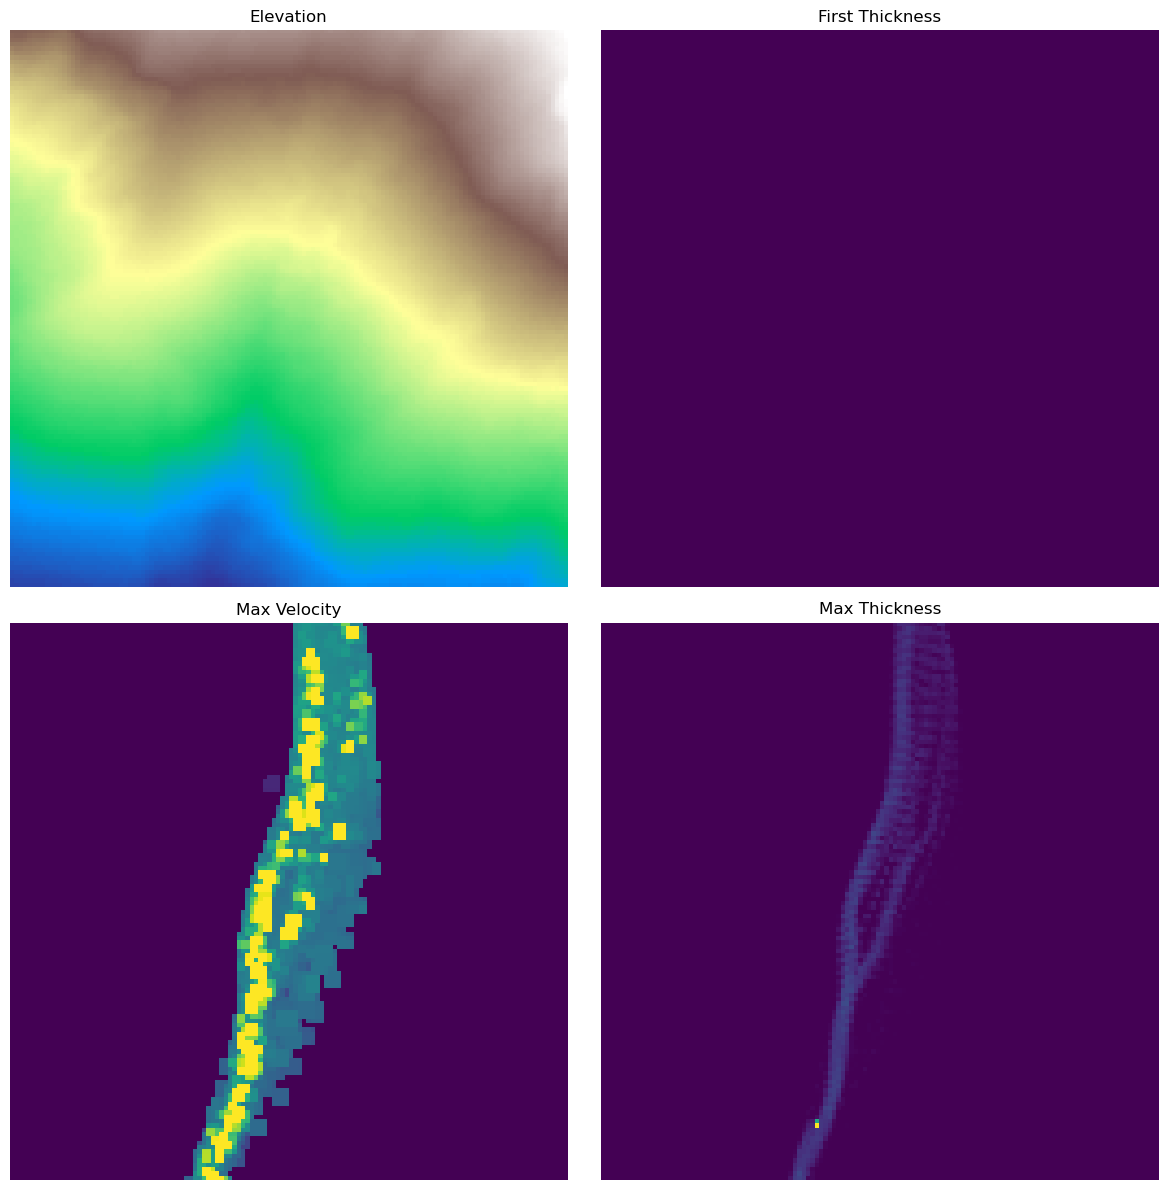

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

model_id = '00092'
basepath = main_dir

def plot_gan_arrays(model_id, base_path):
    # Construct the paths to the GAN arrays
    final_data_path = os.path.join(base_path, str(model_id), f"04_FinalProcessedData_128")
    gan_path = os.path.join(final_data_path, 'gan')
    input_path = os.path.join(gan_path, 'input')
    target_path = os.path.join(gan_path, 'target')

    # Load the GAN arrays
    elevation_array = np.load(os.path.join(input_path, f'{model_id}_elevation.npy'))
    thickness_input_array = np.load(os.path.join(input_path, f'{model_id}_thickness_0.npy'))
    max_velocity_array = np.load(os.path.join(target_path, f'{model_id}_velocity_max.npy'))
    max_thickness_array = np.load(os.path.join(target_path, f'{model_id}_thickness_max.npy'))

    # Create a figure with a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))

    # Plot the elevation array
    axs[0, 0].imshow(elevation_array, cmap='terrain')
    axs[0, 0].set_title('Elevation')
    axs[0, 0].axis('off')

    # Plot the first thickness array
    axs[0, 1].imshow(thickness_input_array, cmap='viridis')
    axs[0, 1].set_title('First Thickness')
    axs[0, 1].axis('off')

    # Plot the max velocity array
    axs[1, 0].imshow(max_velocity_array, cmap='viridis')
    axs[1, 0].set_title('Max Velocity')
    axs[1, 0].axis('off')

    # Plot the max thickness array
    axs[1, 1].imshow(max_thickness_array, cmap='viridis')
    axs[1, 1].set_title('Max Thickness')
    axs[1, 1].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

plot_gan_arrays(model_id, basepath)

In [9]:


# Define the base directory where the models are located
base_dir = main_dir

# Iterate over each model directory in the base directory
for model_id in os.listdir(base_dir):
    model_dir = os.path.join(base_dir, model_id, "04_FinalProcessedData_128")

    # Check if the path is indeed a directory
    if not os.path.isdir(model_dir):
        continue

    # In each model directory, look for thickness and velocity files
    thickness_dir = os.path.join(model_dir, "thickness")
    velocity_dir = os.path.join(model_dir, "velocity")

    # Get the state numbers from the thickness files assuming they match the velocity files
    state_numbers = [f.split('_')[-1].split('.')[0] for f in os.listdir(thickness_dir) if f.endswith('.npy')]

    for state in state_numbers:
        # Construct the file paths for thickness and velocity
        thickness_file = os.path.join(thickness_dir, f"{model_id}_thickness_{state}.npy")
        velocity_file = os.path.join(velocity_dir, f"{model_id}_velocity_{state}.npy")

        # Check if both files exist to avoid errors
        if not os.path.exists(thickness_file) or not os.path.exists(velocity_file):
            continue

        # Load the arrays
        thickness_array = np.load(thickness_file)
        velocity_array = np.load(velocity_file)

        # Check if both arrays only contain zeroes
        if np.all(thickness_array == 0) and np.all(velocity_array == 0):
            # Delete the files if both only contain zeroes
            os.remove(thickness_file)
            os.remove(velocity_file)
            print(f"Deleted files with only zeroes for model {model_id} state {state}")

Deleted files with only zeroes for model 00092 state 10
Deleted files with only zeroes for model 00092 state 11
Deleted files with only zeroes for model 00092 state 118
Deleted files with only zeroes for model 00092 state 119
Deleted files with only zeroes for model 00092 state 12
Deleted files with only zeroes for model 00092 state 120
Deleted files with only zeroes for model 00092 state 121
Deleted files with only zeroes for model 00092 state 122
Deleted files with only zeroes for model 00092 state 123
Deleted files with only zeroes for model 00092 state 124
Deleted files with only zeroes for model 00092 state 125
Deleted files with only zeroes for model 00092 state 126
Deleted files with only zeroes for model 00092 state 127
Deleted files with only zeroes for model 00092 state 128
Deleted files with only zeroes for model 00092 state 129
Deleted files with only zeroes for model 00092 state 13
Deleted files with only zeroes for model 00092 state 130
Deleted files with only zeroes for 